# [C1] Understanding and Visualising Data

# 1.0 Basics

### 1.1 Study Design

- Clinical trials for drugs and other medical treatments
- Reliability and quality-assurance studies for manufactured products
- Observational studies for human health
- Public opinion and other surveys
- Studies involving administrative and other incidental data
- Market research studies
- Agricultural field trials

### 1.2 Types of Research Studies

#### Exploratory vs Confirmatory
- **Confirmatory** - Scientific method - specify falsifiable hypothesis, then test it; collect data to address single question
- **Exploratory** - collect and analyse data without first pre-specifying question

WARNING: watch out for overfitting/multiple testing/p-hacking; the more questions you ask from a dataset, the more likely you are to draw a misleading conclusion

#### Comparative vs Non-comparative
- **Comparative** - voter preference. which ad has higher CTA. which fertiliser yields better.
- **Non-comparative** - estimating absolute quantities, not explicitly comparative. predict company stock value 1 year from now. reduction in blood pressure after drug treatment.

#### Observational vs Experimental
- **Observational** - Arise 'naturally', contrasts based on 'self-selection' of units into groups. Often say subjects are "exposed" to a condition rather than being "assigned" (passive or self-selected, used when impractical or unethical to assign) E.g. compare lifespan, lung cancer, etc in smokers/non-smokers, observe student learning/teaching methods/student test scores
- **Experiments** - Involve manipulation or assignment → experimenter deliberately treats different units in different ways. Often involved random assignment of subjects to "treatment arms". E.g. randomly assign plots of vegetables with or without fertilizer

### 1.3 Power & Bias

- **Power Analysis** - Process to assess whether given study design likely to yield meaningful findings. If data obtained has too little information about the question of interest, results may not be very informative.

- **Bias** - Measurements that are systematically off-target, or sample is not representative of population of interest.Observational studies are especially vulnerable to bias.

### 1.4 Wide Form vs Long Form Data
- **wide form** is like excel, it's easier to read. but it at most can show 'bivariate': row variables vs col variables. slightly more convenient for data entry in studies where each subject is assessed the same number of times.
- **long form** is ensuring each row has only 1 observation. e.g. a person's BP measured on different dates are separate rows. (whereas wide form, when we did survey, it was easier to have person's entire record as 1 row). is more flexible, as it accommodates measures obtained at arbitrary time points; the long format is also more natural for many forms of statistical analysis, such as regression analysis.
- **Other specialized data layouts exist** for other types of data, e.g. data defined as graphs (networks of nodes and edges), images, geospatial data, or text data.

### 1.5 Standard Score & Empirical Rule for Normal Distributions
- **Empirical Rule** (aka 68-95-99.7 rule)

  - $\pm$ 1sd 68%
  - $\pm$ 2sd 95%
  - $\pm$ 3sd 99.7%

- **Z-Score** - (observation - mean)/sd

### 1.6 Simpson's Paradox > confounding variable > corr doesn't imply cause
- **confounding variable** - outside influence that affects relationship between IV(predictor) and DV(outcome)
  - may **hide/obscure/enhance** relationship


## 1.7 Univariate vs Multivariate Analysis (TODO clean up)

#### Univariate

- **Quantitative** - use histogram AND boxplot AND summary stats (pd.describe())
  - histogram gives you 
    - **shape** - symmetric, bell-shaped, left/right-skewed, unimodal/bimodal/multimodal
    - **center** - mean or median
    - **spread** - range, IQR, std, variance
    - **outliers**
  - boxplot
    - note: hist gives you shape well, but boxplots summarise **center, spread** info better.
  - *e.g. The distribution of salaries in San Francisco is bimodal and skewed to the right. Centered at about $80,000 with most of the data between $40,000 and $120,000. A range of roughly $600,000, and outliers are present on the higher end.*  
- **Categorical** - tables, bar charts, pie charts (seldom recommended)
  - bar charts - plot using counts, plot using percentages
  - if nominal data, order doesn't matter, convenient to arrange in descending frequency order
<br/><br/>
#### Multivariate

- **scatter/joint/hexbin/pairplot**
  - Stratify (slice) as much as possible, e.g. looking at arm length vs leg length scatterplot, separate out gender, race, into different graphs. You might see patterns that were otherwise homogeneous as a whole.
- **pd.crosstab(col1, col2)**
  - use contingency/two-way tables 
  - e.g. **df.groupby(['gender','educ','marital']).size().unstack().fillna(0),apply(lambda x: x/x.sum(), axis=1)**
    - group data into every combi of gender/edu/marital, count number in each slice, pivot the marital status into columns (unstack), fill empty with 0, normalize data by row.
- **categorical** - use contingency tables to display, use marginal or conditional distributions, and plot data as side-by-side bar/stacked bar/mosaic plots
- **quantitative** - use **jointplot, np.corrcoef(a,b)**, see any correlation. 
- **from scipy.stats.stats import pearsonr | pearsonr(a,b)**
- is it +ve/-ve? is it linear/non-linear? is it simple/multiple/partial correlation? any outliers?


In [5]:
# UNIVARIATE:
# .hist
# .box
# .describe

# .bar

# MULTIVARIATE:
# .scatter/.jointplot/hexbin/pairplot
# pd.crosstab(a,b)
# # make conditional tables
# df.groupby(['gender','educ','marital']).size().unstack().fillna(0),apply(lambda x: x/x.sum(), axis=1)
# # group data into every combi of gender/edu/marital, count number in each slice, pivot the marital status into columns (unstack), fill empty with 0, normalize data by row.
# np.corrcoef(a,b) | from scipy.stats.stats import pearsonr; pearsonr(a,b) | df.corr() all give you same thing.
# additionally, pearsonr returns (corrcoef, two-tailed p-value)

SyntaxError: invalid syntax (1503170550.py, line 1)

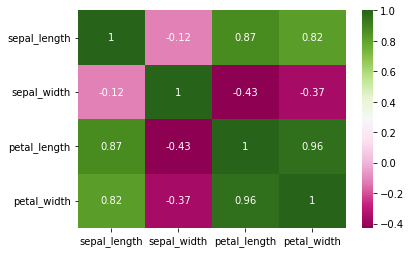

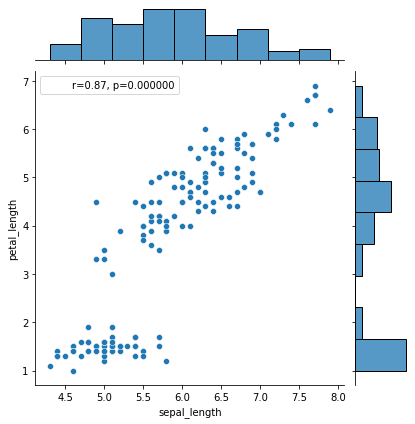

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats.stats import pearsonr

cmap = mpl.cm.PiYG

df = sns.load_dataset('iris')

sns.heatmap(df.corr(), annot=True, cmap=cmap)
pearsonr(df['sepal_length'],df['petal_length'])
np.corrcoef(df['sepal_length'],df['petal_length'])

r, p = pearsonr(df['sepal_length'], df['petal_length'])
graph = sns.jointplot(data=df, x='sepal_length', y='petal_length')
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],[f'r={r:.2f}, p={p:f}'])




# 2.0 Probability and Non-probability Sampling

## 2.1 Sampling from Well-Defined Populations (TODO come back after review in later module)

### **conduct a population census**
- easier for smaller pop
- how much will it cost?
- what administrative data sources already available?

### **probability sampling**
- sampling frame: construct list of all units in population
- determine probability of selection: for every unit on list (known and non-zero)
- select units from list at random: with sampling rates for different subgroups determined by probabilities of selection
- measure randomly selected units
- *e.g. class of 10 males 20 females. a prof wishes to select a PS of 5 males 5 females.*
- *probabilities of selection: 1 out of every 2 males selected. 1 out of every 4 females selected. (1/2, 1/4)*
- **known probabilities** allows us to make **unbiased statements** about both **population features** and **uncertainty in surevy estimates**
- can do CI and HT, only with PS

### **non-probability sampling**
- lots of data, but high potential for sampling bias, lack of representation for some units of population (only capture 'loudmouths' on Twitter)
- key drawback: doesn't involve random selection (generally) > high potential for bias. sampled units not generally representative of larger population of interest
- probabilities of selection cannot be determined for population units a priori > no statistical basis for making inference about population. 
- *e.g. opt-in web surveys, convenience sampling, snowball sampling*
- *big data these days often from NPS. so be careful!*
- so what can we do? two possible approaches

## 2.2 Probability Sampling - Methods

### **PS:simple random sampling**
- have known list of population *N*. randomly select *n* units.
- every unit has equal probability of selection *n/N*
- estimates of means/proportions/totals based on SRS are **unbiased**
- can be with or w/o replacement, typically w/o replacement for SRS (for both, probability still n/N)
- rarely used in practice, expensive
- in theory, SRS will generate i.i.d data for given variable. **in theory.**
### **PS:complex probability sampling**
- anything more complex than SRS
- complex samples have certain key features:
- population divided into strata
- clusters are randomly sampled within a strata
- units randomly sampled within cluster
<br/><br/>
- #### **Stratification**
  - Proportionate allocation (e.g. 50-50% quota allocation of males-females in sample)
  - Stratification will eliminate between-stratum variance in means or totals, from the sampling variance. Important to account for stratification in analysis, else computed sampling variance may be artificially large, thus inferences too conservative, confidence intervals too wide. (in all theoretical repeated samples, we always select 5 men 5 women. We will never have a random sample of 10 men. This reduces our variance.)<br/><br/>
- #### **Clustering**
  - Random sampling of laregr clusters of population elements, possibly across multiple stages (e.g. counties, then segments, then households)
  - Reduces cost, but increases sampling variance, as units within cluster may have similar (correlated) values on variables of interest, thus we aren't measuring as much unique information.
  - increases amount of dependence in observations collected. this lack of independence reduces our effective sample size.
    - Important to account for clustering in analysis, else computed sampling variance may be artificially small, thus inferences too liberal, confidence intervals too narrow.<br/><br/>
- #### **Weighting**
  - If we have:
    - multiple stages of cluster sampling within strata
    - oversampling of certain subgroups
    - there is unequal representation/probabilities of selection for different population units.
  - Weights are the inverse of the probability of selection and used to correct.
    - If my probability of selection is 1/100, and yours is 1/120, my datapoints represent 100 people including myself, yours represents 120 people.
  - Weights also include probabilities of responding
    - If my probability was 1/100, but in my subgroup only 50% responded, then my adjusted weight is 200<br/><br/>
- **Analytic Error**
  - failure to calculate final weighting. many secondary analyses fail to do this.

## 2.3 Sampling Distribution and Sampling Variance

**How to estimate features of population based on only one PS?**
- **Sampling Distribution** 
  - distribution of survey estimates we would see, if we selected many random samples using the same sampling design, and computed an estimate from each.
  - **hypothetical**: (what would happen if we had luxury to draw infinite probability samples, and measure that distribution) In practice, we take 1 PS and we try to estimate this sampling distribution.
  - generally very different in appearance from distribution of values on a single var of interest.
  - with large enough sample size, sampling distribution of estimates will look like a normal distribution, regardless of what estimates are being computed (Central Limit Theorem CLT)
<br/><br/>
- **Sampling Variance**
  - variability in the estimates described by the sampling distribution
  - if hypothetically we drew infinite samples, using the same sampling design, and plotted those estimates, that variability is called this sampling variance.<br/><br/>
**Sampling Error**
  - because we only select 1 PS, a survey estimate will not be equal to population parameter. This is called **sampling error**. How much your mean/proportion/etc is off, compared to population.
  - hypothetically if we took infinite samples and averaged them, we will have true population parameter. This is a key property that we want, and this means we have **unbiased estimates**
  - across hypothetical repeated samples, these sampling errors will vary randomly, and that variability of these sampling errors, describes the **variance of the sampling distribution**<br/><br/>
- with a larger sample size, (sampling more of the population), in theory, there will be less sampling error, sampling errors will be less variable. therefore sampling variance decreases as *n* increases.
**more precise estimates, more confidence in inferential statements. but more costly.**
<br/><br/>
https://markkurzejaumich.shinyapps.io/multiple_population_bias/
<br/><br/>
- **Sampling Distribution Properties**
  - for many common statistics: normal, symmetrical, centered at true value
  - larger sample size >  less variability in estimates
  - can estimate variances of these normal distributions based on only 1 PS > this enables **inference**
<br/><br/>
- **Standard Error**
  - is an estimate of the standard deviation of the sampling distributions of estimates that would arise if we had drawn repeated samples, and computed the same estimate for each random sample. I.e. a standard error gives a sense of the uncertainty associated with our estimate.
    - **variable's variance:** the more variance in the variable of interest, the more imprecise the estimates will be.
    - **outliers** will also affect. proper descriptive stats is important.
    - **sample size**: the larger the sample, the lesser the variability. but just because we have "big data" doesn't mean it was precise.
    - **clustering**: increases amount of dependence in observations collected. this lack of independence reduces our effective sample size.
      - same problem arises in longitudinal studies, multiple obs on 1 unit will be strongly correlated with each other, needs to be accounted for.
      - the larger the sample size from each cluster (thus lesser clusters) will increase standard errors
    - **stratification**: stratified samples tend to produce increased precision, because we are removing between-stratum variance from the variability within our estimates by design.
    - **use of sampling weights** can inflate variance.



## 2.4 Analysis method (idk why this was here. arrange later)

- get pearsonr's to initially find any relationships.
- then you may wish to do regression in order to actually determine the relationship (y = mx + c)
- the larger your sample size, the less variance in your estimate. the same is true for your corr values and reg coeffs
- with CLT, the larger your sample size, distributions of any value of interest(mean/prop/corr/reg coeff) tend towards normal

# 3.0 Population Inferences

- based on estimated features of sampling distributions
- confidence interval estimates for parameters of interest: mean/prop/reg coeff/odds ratio/etc
- hypothesis testing about parameters of interest
<br/><br/>
1. Compute point estimate
2. Estimate sampling variance of the point estimate (Standard Error)
- CI > point estimate $\pm$ 1.96sd
- HT > $H_0$ : could the value of the parameter be ___?
  - is the point estimate close to null value or far away? test statistic uses the z-distance, and we get the p-value, how probable was it to get this value or more extreme? Reject H0 if probability less than our chosen significance level $\alpha$
  - one tailed or two tailed depending on >, <, or $\neq$
<br/><br/>
Both require PS to be used. Cannot use on NPS.

## 3.2 Nonprobability Sampling - Inference Approaches

(read REF-Inference for Nonprobability Samples 16-STS598.pdf pg 255-261)<br>
(see for math formula refs https://byjus.com/maths/probability-and-statistics-symbols/)
https://www.europeansurveyresearch.org/conference/non-probability


- ### **1. Quasi/Pseudo-Randomization Approach:**
- **1.1 Reference Surveys**
  - **Pseudo inclusion probabilities are estimated, and used to correct for selection bias.**
  - **Given estimates of pseudo probabilities, design-based formulas are used for point estimates and variances.**
  - Find some other dataset that was executed with PS, and it must have similar covariates to your NPS (your NPS could have other additional columns, that's fine.)
  - Stack datasets together, with a nps_flag=True/False if sample was from your NPS.
  - Fit a binary regression to estimate inclusion probabilities for the NPS, as a function of all other variables (age, gender, education, ethnicity, etc)
  - Inverse the results and you have weights for your NPS.
  - Now you can compute: What would have been the probability of being in this stacked dataset, for an individual who showed up in the NPS, given all their features?
  - Downside, we cannot estimate sampling variance in this way.
  - *e.g. volunteer panel of persons is recruited to provide a pool from which sample of persons is selected. To respond to a survey,*
    - *a person must have Internet access,*
    - *volunteer for the panel,*
    - *be selected for the particular survey,*
    - *and then respond.*
  - Standard methods can be used to compute the last two terms. 
  - The first two probabilities, having internet access and volunteering for the panel, are more difficult. 
    - Some countries have studies with probability samples that represent the full population that include questions on Internet access. (US National Health Interview Survey is one example.)
    - The probability of volunteering is harder to estimate.<br><br>
  
- **1.2 Sample Matching**
  - can be done on individual or aggregate level.
  - **1.2.1 Individual-level matching:** for each case in a NPS volunteer sample, a matching case is found in a PS reference sample. The matches would be found based on covariates available in each dataset. It may be done based on individual covariate values, or on propensity scores (Rosenbaum and Rubin, 1983). This is an example of predictive mean matching, in which an imputation of an inclusion probability is made for each nonprobability unit.
  - **1.2.2 Aggregate-level matching (Quota matching):** consists of making the frequency distribution of the NPS the same as that of the population. Quota sampling is an example of this. For example, age * race distribution of the sample might be controlled to be the same as that in the population. If we start with a large panel of volunteers, a subsample might be drawn to achieve this kind of distributional balance. Each person would receive the same weight, which is the same way that a proportionally allocated probability sample would be treated. Considered in this way, quota sampling falls into the quasi-randomization framework.
  - A PS used as a reference survey or in sample matching ideally most not be subject to coverage or other types of bias. Many probability samples are subject to high non-response rates and are tantamount to nonprobability samples themselves. Poor quality reference or matching samples can lead to biased estimators of the inclusion probabilities and consequently, biased estimators from the NPS. This is an argument for using large, well-controlled samples conducted by central governments for reference or matching samples if at all possible.<br><br>
- ### **2. Estimation using Pseudo-Weights**
  - this approach assumes that the NPS actually does have a probability sampling mechanism, albeit one with probabilities that have to be estimated under identifying assumptions. The goal is to estimate this unknown probability of selection relying on a true PS or a censur with common variables, that explain the unknown sampling mechanism.
  - (lost) ... regression covariates via beta regression in the PS and predicting $P (S_i = 1|x_i = x_o)$  for the NPS sample elements. The term $P (S_i = 1|x_i = x_o)$ can be obtained by logistic regression, or if high-dim data, via least absolute shrinkage and regression operator (LASSO), Bayesian additive regression trees (BART), or super learner algorithms that combine estimators from numerous model fitting methods. In some settings, the NPS will represent only a portion of the population; e.g. in a setting with binary outcome Y (injure/uninjured), only positive outcomes (injured) might be represented in the NPS... (lost) ... for variance estimation, a bootstrap or jackknife estimator should be used to incorporate both sampling variability in the estimation of the pseudo weights and in the estimation of the main quantity of interest.<br><br>
- ### **3. Superpopulation (y-model) Approach**
  - a statistical model is fitted for Y analysis variable from the sample, and used to project the sample to the full population. (this approach can also be used with a PS.) The difference here is that design-based inference, where the randomization distribution is under the control of the sampler, is not at option for a NPS.
  - consider a simple case of estimating a finite population total.
  - The general idea in model-based estimation when estimating a total, is to sum the responses for the sample cases and add to them the sum of predictions for non-sample cases. The key to forming unbiased estimates is that the variables to be analyzed for the sample and nonsample follow a common model and that this model can be discovered by analyzing the sample responses. When both sample and nonsample units follow the same model, model parameters can be estimated from the sample and used to make predictions for the non-sample cases. An appropriate model usually includes covariates, which are known for each individual sample case. The covariates may or may not be known for individual nonsample cases.
  - For some commmon estimation methods such as post-stratification, only population totals of the covariates are required to construct the estimator, so that individual nonsample X values are unnecessary. Suppose that the mean of a variable $y_i$ follows a linear model. Given a sample $s$, an estimator of the slope parameter is ___. A prediction of the value of a unit in the set of nonsample units...
  - In the superpopulation (y-model) approach, statis- tical properties, like bias and variance, are computed conditional on the set of sample units that is ob- served. This contrasts to the quasi-randomization ap- proach where the pseudo design-based calculations av- erage over the random appearance in the sample of units that have the same configuration of covariates ob- served in the sample. A quasi-randomization estima- tor that only uses inverse estimated inclusion probabil- ities as weights will be biased under a y-model where $E_M (y|x)$ depends on covariates. Consequently, the **y-model approach to constructing estimators can produce more precise estimators than the quasi-randomization approach alone**. 


<!-- 
- ### **2. calibration - weight your NPS to look more like a PS, and other forms of model-based adjustment**
  - compute weights for responding units in NPS, that allow weighted sample to mirror a known population. 
  - *e.g. NPS contains 70% female, so downweight females and upweight males to get 50-50%*
  - limitation: if weighting factor not related to variable of interest, it will not reduce sampling bias


- ### **Population Modelling**
  - Datasets from PS and NPS don't need the same columns. 
  - Use predictive modelling to predict aggregate sample quantities (usually totals) on key variables of interest for population units NOT included in the non-probability sample.
  - *E.g. BRFSS, only some participants asked further questions about heart disease. But then using their figures we use regression to predict the values for everyone else.* 
-->

# (out of context:) Probability distributions 
- https://seeing-theory.brown.edu/probability-distributions/index.html

# [C2] Inferential Statistical Analysis


## 1.0 Research Questions

- Good research questions define exactly what needs to be executed
  
- **Examples**
  - What proportion of all parents with toddlers report they use a car seat for all travel with their toddler?
    - Estimate a Population Proportion with Confidence
  - What is the average cartwheel distance for all adults?
    - Estimate a Population Mean with Confidence
  - What is the average difference in self-reported education between older twin and younger twin?
    - Estimate a Population Mean Difference with Confidence
  - Considering Mexican-American adults (ages 18-29) living in the United States, do males have a significantly higher mean Body Mass Index than females?
    - Test a Theory about Two Population Means
  - In previous years 52% of parents believed electronics and social media was cause of teenager's lack of sleep. Do more parents today believe that their teenager's lack of sleep is caused due to electronics and social media?
    - Test a Theory about a Population Proportion


# 2.0 Confidence Intervals
https://nathancarter.github.io/how2data/site/tasks/

## 2.1 CI - One Proportion

- $\hat{p} \pm z\sqrt{\frac{\hat{p}(1-\hat{p})}{n} }$

  |   |  90%  |  95%  |  98%  |  99%  | 
  |---|-------|-------|-------|-------|
  | z | 1.645 |  1.96 | 2.326 | 2.576 |

**Interpretation**
- Range of reasonable values for our parameter
- "With 95% confidence, the population proportion of interest is estimated to be between (lcb , ucb)"
- If we repeated sampled using the same sampling design and produced a 95% CI each time, we would expect 95% of those resulting intervals to contain the population mean of interest.


**Assumptions** 
- best estimate - simple random sample
- large enough sample size (in order to use z-values), we need normal curve approximation. (at least 10 of each response outcome. e.g. 10 yes 10 no)


**Conservative Approach - what if our $\hat{p}$ is not accurate and we want to maximise the interval?**
-  $\hat{p} \pm 2\frac{1}{2\sqrt{n}}$

## 2.2 CI - Proportion Difference

- $(\hat{p}_1 - \hat{p}_2) \pm z\sqrt{ \frac{\hat{p}_1(1-\hat{p}_1)}{n_1} + \frac{\hat{p}_2(1-\hat{p}_2)}{n_2} }$

**Assumptions**
- two independent random samples
- large enough sample size (in order to use z-values), we need normal curve approximation. (at least 10 of each response outcome. e.g. 10 yes 10 no)


## 2.3 CI - One Mean

- $\bar{x} \pm t*\frac{s}{\sqrt{n}}$

- t* multiplier comes from t-dist with $n-1$ degrees of freedom

**Assumptions**
- random sample
- normal distribution or large enough for CLT to approximate normal (to use z-scores)
  - check hist and qqplot

## 2.4 CI - Mean Difference (Paired)

- $\bar{x}_d \pm t*\frac{s_d}{\sqrt{n}}$

- t* multiplier comes from t-dist with $n-1$ degrees of freedom

**Assumptions**
- random sample
- normal distribution or large enough for CLT to approximate normal (to use z-scores)
   - check hist and qqplot

## 2.5 CI - Mean Difference (Indep)

**Assumptions**
- random sample
- normal distribution or large enough for CLT to approximate normal (to use z-scores)
    - check hist and qqplot
- if std and boxplot IQR looks similar, use pooled approach. otherwise use unpooled

**Pooled Approach**
- variance of 2 populations assumed to be equal
- $(\bar{x}_1 - \bar{x}_2) \pm t* \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}} \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}$
- t* multiplier comes from t-dist with $n_1 + n_2 - 2$ degrees of freedom

**Unpooled Approach**
- $(\bar{x}_1 - \bar{x}_2) \pm t* \sqrt{ \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} }$
- t* multiplier comes from t-dist. degrees of freedom found by using Welch's approximation (software does this)
- If unavailable, conservative approach is use the smaller $n-1$ , i.e. $df=min(n_1-1,n_2-1)$


## 2.6 CI - One Variance
## 2.7 CI - Ratio of Two Population Variances
## 2.8 CI - Regression Coefficient

In [ ]:
#### CI - ONE VARIANCE ####
# Load in EuStockMarkets data
from rdatasets import data
import pandas as pd
df = data('EuStockMarkets')
# Select the column for Germany's DAX closing prices
sample = df['DAX']

from scipy import stats
# Find the critical values from the right and left tails of the Chi-square distribution
alpha = 0.05       # replace with your chosen alpha (here, a 95% confidence level)
n = len( sample )
left_critical_val = stats.chi2.ppf(1-alpha/2, df=n-1)
right_critical_val = stats.chi2.ppf(alpha/2, df=n-1)

# Find the upper and lower bounds of the confidence interval and print them out
lower_bound = ((n - 1)*sample.var())/left_critical_val
upper_bound = ((n - 1)*sample.var())/right_critical_val
lower_bound, upper_bound
#### CI - ONE VARIANCE ####


#### CI - RATIO OF TWO VARIANCES ####
from rdatasets import data
import pandas as pd

# Load in the EuStockMarkets data and convert to a DataFrame
EuStockMarkets = data('EuStockMarkets')
df = pd.DataFrame(EuStockMarkets[['DAX', 'CAC']])

# Our two samples are its DAX and CAC columns
sample1 = df['DAX'].tolist()
sample2 = df['CAC'].tolist()
# The degrees of freedom in each sample is its length minus 1
sample1_df = len(sample1) - 1
sample2_df = len(sample2) - 1

# Compute the ratio of the variances
import statistics
ratio = statistics.variance(sample1) / statistics.variance(sample2)

# Find the critical values from the F-distribution
from scipy import stats
alpha = 0.05       # replace with your chosen alpha (here, a 95% confidence level)
lower_critical_value = 1 / stats.f.ppf(q = 1 - alpha/2, dfn = sample1_df, dfd = sample2_df)
upper_critical_value = stats.f.ppf(q = 1 - alpha/2, dfn = sample2_df, dfd = sample1_df)

# Compute the confidence interval
lower_bound = ratio * lower_critical_value
upper_bound = ratio * upper_critical_value
lower_bound, upper_bound
#### CI - RATIO OF TWO VARIANCES ####


#### CI - REGRESSION COEFFICIENT ####
import statsmodels.api as sm

xs = [  34,   9,  78,  60,  22,  45,  83,  59,  25 ]
ys = [ 126, 347, 298, 309, 450, 187, 266, 385, 400 ]

xs = sm.add_constant( xs )
model = sm.OLS( ys, xs )
results = model.fit()
results.conf_int( alpha=0.05 )
#### CI - REGRESSION COEFFICIENT ####

# 00 Confidence Intervals

#### quick ref z-table for common values. only for proportion, means use t distribution.
|   |  90%  |  95%  |  98%  |  99%  | 
|---|-------|-------|-------|-------|
| z | 1.645 |  1.96 | 2.326 | 2.576 |


### **CI - one proportion**
- **Assumptions** 
  - best estimate - simple random sample
  - large enough sample size (in order to use z-values), we need normal curve approximation. (at least 10 of each response outcome. e.g. 10 yes 10 no)

  $\hat{p} \pm z\sqrt{\frac{\hat{p}(1-\hat{p})}{n} }$
  --

  conservative, when we unsure of point estimate accuracy, and therefore want to maximise interval

  $\hat{p} \pm 2\frac{1}{2\sqrt{n}}$
  --


### **CI - proportion difference**
- **Assumptions**
  - two independent random samples
  - large enough sample size (in order to use z-values), we need normal curve approximation. (at least 10 of each response outcome. e.g. 10 yes 10 no)

  $(\hat{p}_1 - \hat{p}_2) \pm z\sqrt{ \frac{\hat{p}_1(1-\hat{p}_1)}{n_1} + \frac{\hat{p}_2(1-\hat{p}_2)}{n_2} }$
  --
  

### **CI - one mean**
- **Assumptions**
  - random sample
  - normal distribution or large enough for CLT to approximate normal (to use z-scores)
    - check hist and qqplot

  $\bar{x} \pm t^* \frac{s}{\sqrt{n}}$
  --

  t* multiplier comes from t-dist with $n-1$ degrees of freedom



### **CI - mean difference (paired)**
- **Assumptions**
  - random sample
  - independent
  - normal distribution or large enough for CLT to approximate normal (to use z-scores)
     - check hist and qqplot
  
  $\bar{x}_d \pm t^* \frac{s_d}{\sqrt{n}}$
  --

  t* multiplier comes from t-dist with $n-1$ degrees of freedom



### **CI - mean difference (independent)**
- **Assumptions**
  - random sample
  - normal distribution or large enough for CLT to approximate normal (to use z-scores)
      - check hist and qqplot
  - if std and boxplot IQR looks similar, use pooled approach. otherwise use unpooled
<br/><br/>
- **Pooled Approach**
  - variance of 2 populations assumed to be equal
  
  $(\bar{x}_1 - \bar{x}_2) \pm t^* \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}} \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}$
  --
  - t* multiplier comes from t-dist with $n_1 + n_2 - 2$ degrees of freedom
<br/><br/>
- **Unpooled Approach**
  
  $(\bar{x}_1 - \bar{x}_2) \pm t^* \sqrt{ \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} }$
  --
  - t* multiplier comes from t-dist. degrees of freedom found by using Welch's approximation (ttest_ind does this)
    - from scipy import stats
    - stats.ttest_ind( data1, data2, equal_var=[True|False], alternative = ['two-sided'|'greater'|'less'])
  - If unavailable, conservative approach is use the smaller $n-1$ , i.e. $df=min(n_1-1,n_2-1)$



# 00 Hypothesis Tests

### **HT - one proportion**
- **Check Assumptions**
  - random sample
  - large enough sample size, at least 10 of each outcome.
    - we don't know true p. so we will use pseudo-p, $p_0$

- **Setup Test**
  - $H_0 : p = 0.5$
  - $H_\alpha : p <, >, \neq 0.5$
  
  z test statistic = (best estimate - hypothesized estimate) / standard error of estimate

  z test statistic = $\frac{\hat{p}-p_0}{se(\hat{p})}$ , where $se(\hat{p}) = \sqrt{\frac{p_0(1-p_0)}{n}}$
  --


### **HT - proportion difference**

### **HT - one mean**

### **HT - mean difference (paired)**

### **HT - mean difference (independent)**


# 00 CI and HT helper methods

In [267]:
#### CONFIDENCE INTERVALS AND HYPOTHESIS TESTS ####
############### HANAFI HAFFIDZ ####################
from scipy import stats
import numpy as np
import statsmodels.api as sm
import scipy.stats.distributions as dist
from statsmodels.stats.proportion import proportion_confint

#### ASSUMPTIONS ####
# for one proportion / proportion difference
# - random sample
# - large enough sample size, at least 10 of each outcome

# for one mean
# - random sample
# - large enough sample size for CLT to approx normal, or normal distribution of variable of interest
#   - check with histogram and qqplot

# for mean difference (paired)
# - random sample
# - large enough sample size for CLT to approx normal, or normal distribution of variable of interest
#   - check with histogram and qqplot

# for mean difference (indep)
# - random sample
# - independent
# - large enough sample size for CLT to approx normal, or normal distribution of variable of interest
#   - check with histogram and qqplot
# - checking pooled or unpooled approach
#   - compare sd, boxplot IQRs, if similar, can use pooled (default: unpooled)
#### ASSUMPTIONS ####


# ci_prop(n, sample_prop, alpha=0.05)
# ci_propdiff(n1, n2, sample_prop1, sample_prop2, alpha=0.05)
# ci_mean(data, alpha=0.05)
# ci_meandiffpaired(data1, data2, alpha=0.05)
# ci_meandiffindep(data1, data2, pooled=False, alpha=0.05)

# ht_prop(n, sample_prop, hyp_prop, alt='two-sided', alpha=0.05)
# ht_propdiff(n1, n2, sample_prop1, sample_prop2, hyp_diff=0, alt='two-sided', alpha=0.05)
# ht_mean(data, hyp_mean, alt='two-sided', alpha=0.05)
# ht_meandiffpaired(data1, data2, hyp_diff=0, alt='two-sided', alpha=0.05)
# ht_meandiffindep(data1, data2, hyp_diff=0, alt='two-sided', pooled=False, alpha=0.05)


def ci_prop(n, sample_prop, alpha=0.05):
    # n             - sample size, int
    # sample_prop   - sample proportion, float (0,1)
    # alpha         - significance level. 0.05 for 95% CI
    # RETURNS (lower bound, upper bound)
    p = sample_prop
    se_est = np.sqrt((p*(1-p))/(n))
    z = stats.norm.ppf(1-alpha/2)
    moe = z * se_est
    lcb = sample_prop-moe
    ucb = sample_prop+moe
    print( proportion_confint(sample_prop*n, n, alpha=alpha, method='normal') )
    return lcb, ucb

def ci_propdiff(n1, n2, sample_prop1, sample_prop2, alpha=0.05):
    p1 = sample_prop1
    p2 = sample_prop2
    se1_est = np.sqrt(p1*(1-p1)/n1)
    se2_est = np.sqrt(p2*(1-p2)/n2)
    se_diff_est = np.sqrt(se1_est**2 + se2_est**2)
    z = stats.norm.ppf(1-alpha/2)
    moe = z * se_diff_est
    ucb = (p1 - p2) + moe
    lcb = (p1 - p2) - moe
    return lcb, ucb

def ci_mean(data, alpha=0.05):
    # stats.t.interval(alpha=0.95, loc=np.mean(data), df=len(data)-1, scale=stats.sem(data)) 
    # compared, works accurate

    n = len(data)
    dof = n-1
    sample_mean = np.mean( data )
    sd = np.std( data , ddof=1)
    tstar = stats.t.ppf(1-alpha/2, dof)
    se_est = sd / np.sqrt(n) # se = stats.sem( data ) # both work
    moe = tstar * se_est
    lcb = sample_mean-moe
    ucb = sample_mean+moe
    return lcb, ucb

def ci_meandiffpaired(data1, data2, alpha=0.05):
    data1 = np.array(data1)
    data2 = np.array(data2)
    
    diff_samples = data1 - data2                        
    n = len(data1)  

    diff_mean = np.mean(diff_samples)
    diff_sd = np.std(diff_samples, ddof=1)                       
    
    tstar = stats.t.ppf(q = 1-alpha/2, df = n - 1)   
    moe = tstar * diff_sd/np.sqrt(n)
    lcb = diff_mean - moe
    ucb = diff_mean + moe
    return lcb, ucb

def ci_meandiffindep(data1, data2, pooled=False, alpha=0.05):
    data1 = np.array(data1)
    data2 = np.array(data2)
    n1 = len(data1)
    n2 = len(data2)
    sd1 = np.std(data1) 
    sd2 = np.std(data2)
    sample_mean1 = np.mean(data1)
    sample_mean2 = np.mean(data2)
    sample_mean_diff = sample_mean1 - sample_mean2
    se_est=0
    tstar=0
    dof=0
   
    if pooled==True:
        dof=n1+n2-2
        se_est = np.sqrt( ( (n1-1)*(sd1**2) + (n2-1)*(sd2**2)  ) / dof ) * np.sqrt(1/n1 + 1/n2)
    else:
        # for unpooled, this does not use Welch's t-test, but conservative approach on dof:
        dof=np.min([n1-1,n2-1]) # conservative dof.
        # Welch-Satterthwaite equation to approximate dof 
        dof = ( sd1**2/n1 + sd2**2/n2 )**2 / ( ( sd1**4/(n1**2*(n1-1)) + sd2**4/(n2**2*(n2-1)) )  ) 

        se_est = np.sqrt( (sd1**2)/n1 +(sd2**2)/n2 )

    # # my version, when using unpooled approach, does not use Welch to find dof, 
    # # but uses conservative approach of choosing the smaller n-1 of the two samples.
    # # thus, printing ttest_ind version too for backup.
    # t, pv = stats.ttest_ind( data1, data2, equal_var=pooled, alternative = 'two-sided')
    # # doesn't work. totally diff value

    tstar = stats.t.ppf(q = 1-alpha/2, df = dof)   
    
    moe = tstar * se_est
    lcb = sample_mean_diff - moe
    ucb = sample_mean_diff + moe
    return lcb, ucb

def ht_prop(n, sample_prop, hyp_prop, alt='two-sided', alpha=0.05):
    # n             - sample size, int
    # sample_prop   - sample proportion, float (0,1)
    # hyp_prop      - null value, float (0,1)
    # alt          - {'smaller','larger','two-sided'}
    # alpha         - significance level. 0.05 for 95% CI
    # RETURNS (z_test_stat, p_value, reject_h0)
    p = sample_prop
    se_est = np.sqrt((p*(1-p))/(n))
    ztest_stat = (p - hyp_prop)/se_est

    if (alt=='two-sided'):
        pval = 2*stats.norm.cdf(-abs(ztest_stat))
        # pval = 2*stats.norm.sf(abs(ztest_stat))  # two-tailed p-value
    elif (alt=='smaller' or alt=='less'):
        pval = stats.norm.cdf(ztest_stat)
        # pval = stats.norm.sf(abs(ztest_stat))    # right-tailed p-value
    elif (alt=='larger' or alt=='greater' ):
        pval = stats.norm.cdf(-ztest_stat)
        # pval = stats.norm.sf(-ztest_stat)        # left-tailed p-value
    else:
        print('Error\nUsage: ht_prop(n, sample_prop, hyp_prop, alt=\'two-sided\', alpha=0.05)')
        return False

    # DEBUG
    ztest_stat2, pval2 = sm.stats.proportions_ztest(sample_prop * n, n, hyp_prop, alternative=alt, prop_var=hyp_prop)
    ztest_stat2, pval2 = sm.stats.proportions_ztest(sample_prop * n, n, hyp_prop, alternative=alt, prop_var=None)
    print(ztest_stat2, pval2)

    reject_h0 = pval < alpha
    return ztest_stat, pval, reject_h0

def ht_propdiff(n1, n2, sample_prop1, sample_prop2, hyp_diff=0, alt='two-sided', alpha=0.05):
    # n1, n2         - sample size, int
    # sample_prop1,2 - sample proportion, float (0,1)
    # hyp_prop       - null value, float (0,1)
    # alt            - {'smaller','larger','two-sided'}
    # alpha          - significance level. 0.05 for 95% CI

    # equation will be treated as sample_prop1 - sample_prop2
    # RETURNS (z_test_stat, p_value, reject_h0)

    p1 = sample_prop1
    p2 = sample_prop2

    # combined population proportion estimate, variance, stderr
    phat = (p1*n1 + p2*n2) / (n1 + n2)
    va = phat * (1 - phat)
    se  = np.sqrt(va * (1/n1 + 1/n2)) # as per Umich course
    # TODO check formula, this looks like unpooled:
    se2 = np.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2) # found online, formula seems slightly diff, looks like unpooled 

    # Test statistic and its p-value
    ztest_stat  = ((p1 - p2)- hyp_diff) / se 
    test_stat2 = ((p1 - p2) - hyp_diff)/ se2
    
    #pval = 2*dist.norm.cdf(-np.abs(test_stat))

    if (alt=='two-sided'):
        pval = 2*stats.norm.cdf(-abs(ztest_stat))  # two-tailed p-value
    elif (alt=='smaller' or alt=='less'):
        pval = stats.norm.cdf(ztest_stat)    # right-tailed p-value
    elif (alt=='larger' or alt=='greater' ):
        pval = stats.norm.cdf(-ztest_stat)        # left-tailed p-value
    else:
        print('Error\nUsage: ht_propdiff(n1, n2, sample_prop1, sample_prop2, hyp_diff=0, alt=\'two-sided\', alpha=0.05)')
        return False

    reject_h0 = pval < alpha
    return ztest_stat, pval, reject_h0

def ht_mean(data, hyp_mean, alt='two-sided', alpha=0.05):
    test_stat, p_val = stats.ttest_1samp( data, hyp_mean , alternative=alt) # online method
    print(test_stat, p_val)

    n = len(data)
    dof = n-1
    sample_mean = np.mean( data )
    sd = np.std( data , ddof=1)

    se_est = sd / np.sqrt(n) # se = stats.sem( data ) # both work 
    # se_population = pop_sd / np.sqrt(n) # if pop sd is known, use this

    ttest_stat = (sample_mean - hyp_mean)/se_est

    if (alt=='two-sided'):
        pval = 2*stats.t.cdf(-abs(ttest_stat),dof)
    elif (alt=='smaller' or alt=='less'):
        pval = stats.t.cdf(ttest_stat,dof)  # left
    elif (alt=='larger' or alt=='greater' ):
        pval = stats.t.cdf(-ttest_stat,dof) # right
    else:
        print('Error\nUsage: ht_mean(data, hyp_mean, alt=\'two-sided/smaller/larger\', alpha=0.05)')
        return False

    reject_H0 = pval < alpha
    return ttest_stat, pval, reject_H0

def ht_meandiffpaired(data1, data2, hyp_diff=0, alt='two-sided', alpha=0.05):

    data1 = np.array(data1)
    data2 = np.array(data2)
    tstat, pval = stats.ttest_rel(data1, data2, alternative = alt)
    print(tstat, pval)

    diff_samples = data1 - data2                        
    n = len(data1)
    dof=n-1  

    diff_mean = np.mean(diff_samples)
    diff_sd = np.std(diff_samples, ddof=1)      
    se_est = diff_sd / np.sqrt(n)                 
    
    ttest_stat = (diff_mean - hyp_diff)/se_est

    if (alt=='two-sided'):
        pval = 2*stats.t.cdf(-abs(ttest_stat),dof)
    elif (alt=='smaller' or alt=='less'):
        pval = stats.t.cdf(ttest_stat,dof)  # left
    elif (alt=='larger' or alt=='greater' ):
        pval = stats.t.cdf(-ttest_stat,dof) # right
    else:
        print('Error\nUsage: ht_meandiffpaired(data1, data2, hyp_diff=0, alt=\'two-sided\', alpha=0.05)')
        return False

    reject_H0 = pval < alpha
    return ttest_stat, pval, reject_H0
    
def ht_meandiffindep(data1, data2, hyp_diff=0, alt='two-sided', pooled=False, alpha=0.05):
    data1 = np.array(data1)
    data2 = np.array(data2)
    n1 = len(data1)
    n2 = len(data2)
    sd1 = np.std(data1, ddof=1) 
    sd2 = np.std(data2, ddof=1)
    sample_mean1 = np.mean(data1)
    sample_mean2 = np.mean(data2)
    sample_mean_diff = sample_mean1 - sample_mean2

    se_est=0
    dof=0
    if pooled==True:
        dof=n1+n2-2
        se_est = np.sqrt( ( (n1-1)*(sd1**2) + (n2-1)*(sd2**2)  ) / dof ) * np.sqrt(1/n1 + 1/n2)
    else:
        # for unpooled, this does not use Welch's t-test, but conservative approach on dof:
        dof=np.min([n1-1,n2-1])
        # Welch-Satterthwaite equation to approximate dof 
        dof = ( sd1**2/n1 + sd2**2/n2 )**2 / ( ( sd1**4/(n1**2*(n1-1)) + sd2**4/(n2**2*(n2-1)) )  ) 

        se_est = np.sqrt( (sd1**2)/n1 +(sd2**2)/n2 )
    
    ttest_stat = (sample_mean_diff - hyp_diff)/se_est
    if (alt=='two-sided'):
        pval = 2*stats.t.cdf(-abs(ttest_stat),dof)
        # DEBUG
        t, pv = stats.ttest_ind( data1, data2, equal_var=pooled, alternative = alt)
    elif (alt=='smaller' or alt=='less'):
        pval = stats.t.cdf(ttest_stat,dof)  # left
        # DEBUG
        t, pv = stats.ttest_ind( data1, data2, equal_var=pooled, alternative = 'less')
    elif (alt=='larger' or alt=='greater' ):
        pval = stats.t.cdf(-ttest_stat,dof) # right
        # DEBUG
        t, pv = stats.ttest_ind( data1, data2, equal_var=pooled, alternative = 'greater')
    else:
        print('Error\nUsage: ht_meandiffpaired(data1, data2, hyp_diff=0, alt=\'two-sided\', alpha=0.05)')
        return False

    # print(t,pv)
    # compared, accurate.
    reject_H0 = pval < alpha
    return ttest_stat, pval, reject_H0



# ci_prop               ACCURATE    from statsmodels.stats.proportion import proportion_confint
# ht_prop               ACCURATE    import statsmodels.api as sm, sm.stats.proportions_ztest
# ci_propdiff           no_compare
# ht_propdiff           no_compare
# ci_mean               no_compare
# ht_mean               ACCURATE    from scipy import stats, stats.ttest_1samp
# ci_meandiffpaired     no_compare
# ht_meandiffpaired     ACCURATE    from scipy import stats, stats.ttest_rel
# ci_meandiffindep      no_compare    
# ht_meandiffindep      ACCURATE    from scipy import stats, stats.ttest_ind


data1 = [10,2,9,24,25,3]
data2 = [1,2,3,4,5,6]
data3 = np.random.normal(0,1,10000)
data4 = np.random.normal(1,1,10000)


# ci_prop(200,0.9,0.02)
# ht_prop(200,0.9,0.7,'larger')
# ci_propdiff(200,100,0.7,0.9)
# ht_propdiff(200,100,0.7,0.9,0,'larger')
# ci_mean(data3)
# ht_mean(data3,.03)
# ci_meandiffpaired(data2,data1)
# ht_meandiffpaired(data2,data1,0)

# ci_meandiffindep(data2,data1,pooled=False)
# ht_meandiffindep(data2,data1,pooled=False,alt='less')
# ht_prop(200,0.9,0.8,'two-sided',0.05)

#ht_propdiff


(0.8506507092860044, 0.9493492907139957)


(0.8506507092860044, 0.9493492907139957)

## Bayesian Framework

In the field of statistics, there are two frameworks: Frequentist and Bayesian. Within this course we are primarily looking at frequentist statistics. Most of the things you'll learn will have adaptations/extensions for Bayesian statistics.

**Example 1**<br>
- What team won the 2018 World Cup? [I answered Germany]
- Can you give a probability of how correct you think your answer is? [I answered 20%, I think it may be amongst the 5 countries that could've won] (Anyway the answer was France.)

The number you just gave, is only allowed in Bayesian Statistics.

In frequentist statistics, because the game has already been played, we already know the answer. Your answer was either correct or wrong. Either 0% or 100%. Any number you assign in between can only be given in the Bayesian framework.

In frequentist statistics, probabilities are made of the world. So whether something is actually correct or incorrect.
In Bayesian statistics, probabilities are made in your mind.
In either case, before the game is played, you can go through and make a number of probability calculations.
Suppose you know there are 211 teams eligible for the World Cup. So each team starts with 1/211 chance of winning.

Maybe you are good at recognising flags, so you can recognise the 32 teams in the Finals from the picture. So each team had a 1/32 chance of winning.
However you might also know that Germany tends to do fairly well. So maybe you upweight their probability. Then lower the weights on the other teams. You can adjust.
In frequentist statistics, this is allowed before the game, but not after the game.
In Bayesian statistics, you can continue to do so, as long as you don't know the answer.

**Example 2**<br>
Two bags. <br>
Bag A: 2 silver chocolates.<br>
Bag B: 1 silver, 1 purple. <br>

Randomly pick a bag, randomly pick a chocolate.<br>
We got a silver chocolate.<br>
There was 2 of 2 ways to get a silver from Bag A<br>
There was 1 of 2 ways to get a silver from Bag B<br>

In Bayesian statistics, I use updated information to decide.<br>
So in Bayesian:<br>
There's a 2/3 chance of getting a silver chocolate from Bag A<br>
There's a 1/3 chance of getting a silver chocolate from Bag B<br>

In frequentist:<br>
I have 2 bags. It is 50% likely to be either Bag A or B.<br>

This illustrates 2 main points about Bayesian:<br>
Probabilities are made in your mind, rather than in the world<br>
You can update your probabilities as you get new information. E.g. knowing i drew a silver gives me additional information and I update the probability of how likely this bag is to be A.

In the statistics community, there is a contentious debate between frequentist and Bayesian. 
Maybe you can see where you weigh in on that.


## -

## -

## -

## -

## -

## -

## -